# Deep Learning Study Group -- Intro to Keras

In the following few sections we'll try to show off a small subset of Keras features on a number of examples.

## Multi Layer Perceptron in Keras with MNIST dataset

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import re
import os

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras.layers.embeddings import Embedding
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.recurrent import SimpleRNN, LSTM, GRU
from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers.wrappers import TimeDistributed

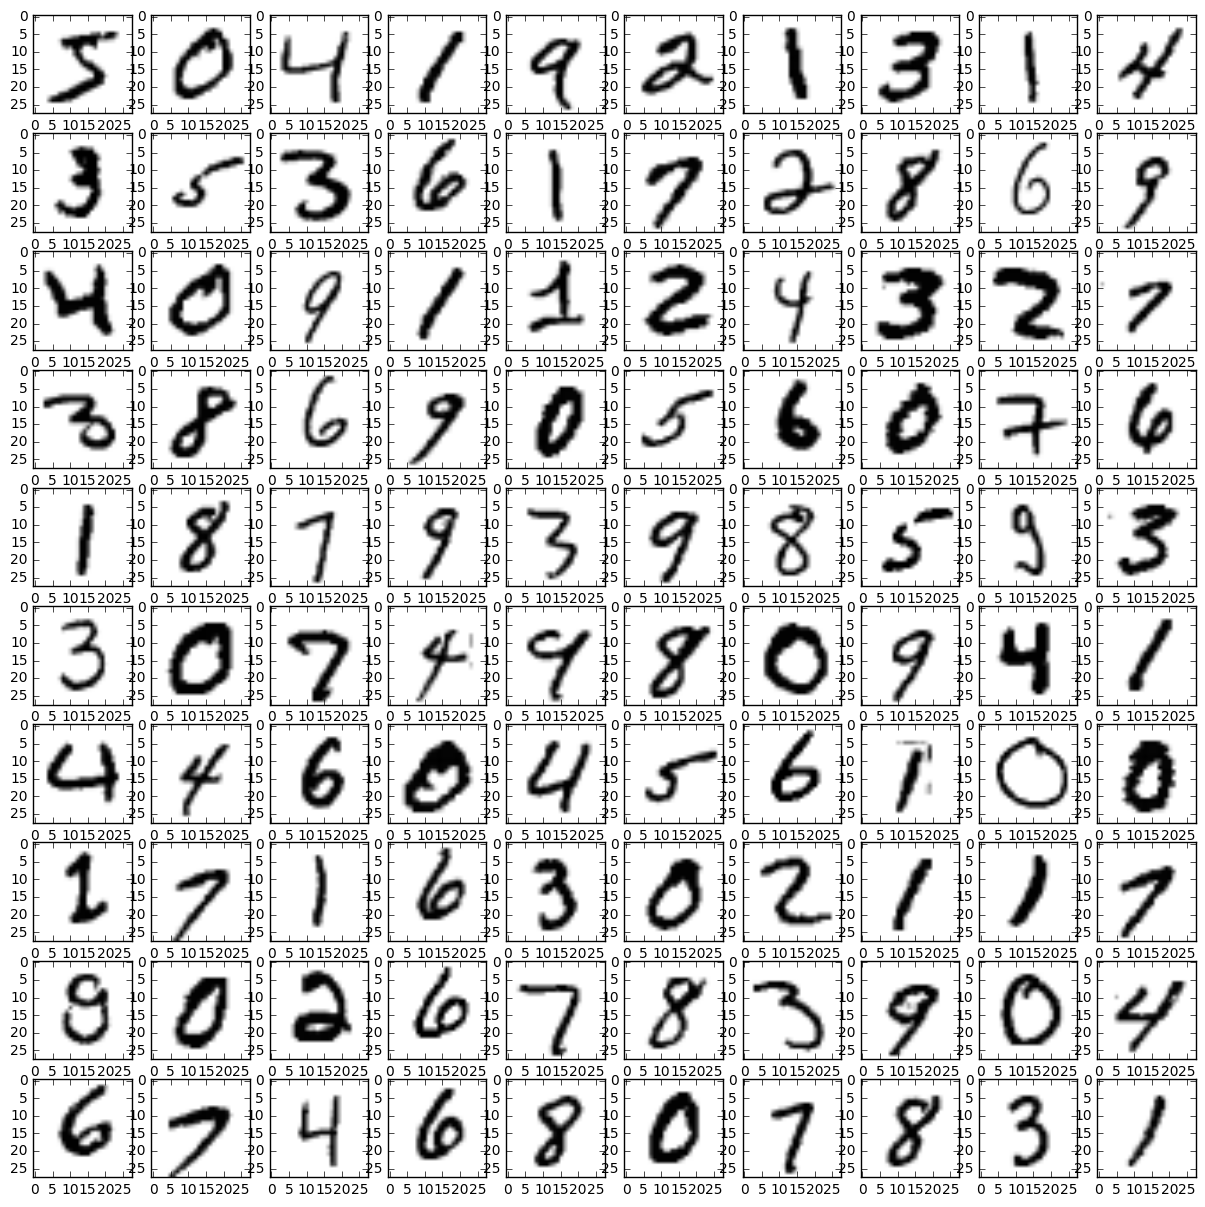

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.figure(figsize=(15, 15))
for i, x in enumerate(X_train[:100]):
    plt.subplot(10, 10, i + 1)
    plt.imshow(1 - x / 255.0, cmap="gray")

Note that the images will be normalized and flattened out into one vector. Moreover, the outputs will be one-hot encoded.

In [134]:
X_train = X_train.reshape(60000, 28**2).astype('float32') / 255
X_test = X_test.reshape(10000, 28**2).astype('float32') / 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### Basic model

In [137]:
model = Sequential()
model.add(Dense(512, input_shape=(28 * 28,)))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

          
sgd = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

Fit the model on the training data (over 10 epochs, while sending data to the network in batches of 32).

In [136]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10,
          verbose=1, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 14s - loss: 0.0922 - acc: 0.1010 - val_loss: 0.0923 - val_acc: 0.0995
Epoch 2/10
54000/54000 [==============================] - 13s - loss: 0.0918 - acc: 0.1007 - val_loss: 0.0922 - val_acc: 0.0992
Epoch 3/10
54000/54000 [==============================] - 13s - loss: 0.0917 - acc: 0.1030 - val_loss: 0.0913 - val_acc: 0.0992
Epoch 4/10
54000/54000 [==============================] - 13s - loss: 0.0917 - acc: 0.1016 - val_loss: 0.0915 - val_acc: 0.1038
Epoch 5/10
54000/54000 [==============================] - 12s - loss: 0.0917 - acc: 0.1017 - val_loss: 0.0910 - val_acc: 0.1050
Epoch 6/10
54000/54000 [==============================] - 13s - loss: 0.0917 - acc: 0.1042 - val_loss: 0.0925 - val_acc: 0.0952
Epoch 7/10
54000/54000 [==============================] - 12s - loss: 0.0917 - acc: 0.1025 - val_loss: 0.0921 - val_acc: 0.1050
Epoch 8/10
54000/54000 [==============================]

Let's now see how does the model do on the test set.

In [130]:
print("\nTest accuracy: {}".format(model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 0s     

Test accuracy: 0.973


In [131]:
y_hat = model.predict_classes(X_test)
pd.crosstab(y_hat, y_test)

 9760/10000 [============================>.] - ETA: 0s

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,971,0,6,0,1,3,6,2,3,3
1,0,1123,1,0,0,1,3,5,2,4
2,1,4,1004,4,5,1,2,8,3,0
3,2,1,4,983,0,10,1,6,11,8
4,0,0,3,0,957,3,8,1,5,13
5,2,1,0,11,0,862,7,0,7,4
6,1,2,3,0,2,5,928,0,2,0
7,1,1,8,7,5,3,0,1003,7,7
8,2,3,3,3,1,3,3,0,930,1


Hmm. Not too bad for such a simple model, but there are still quite a few mistakes here and there, especially on the boundaries (7 vs 9, 8 vs 2 or 7 vs 1). 

Let's see whether a bigger model would help.

### Bigger model

In [138]:
model = Sequential()

model.add(Dense(512, input_shape=(28 * 28,), init="glorot_normal"))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(512, init="glorot_normal"))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(512, init="glorot_normal"))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(512, init="glorot_normal"))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [22]:
sgd = SGD(lr=0.01, momentum =0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [23]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10,
          verbose=1, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 41s - loss: 0.5660 - acc: 0.8199 - val_loss: 0.1366 - val_acc: 0.9615
Epoch 2/10
54000/54000 [==============================] - 44s - loss: 0.2698 - acc: 0.9227 - val_loss: 0.1075 - val_acc: 0.9683
Epoch 3/10
54000/54000 [==============================] - 44s - loss: 0.2165 - acc: 0.9396 - val_loss: 0.0865 - val_acc: 0.9740
Epoch 4/10
54000/54000 [==============================] - 42s - loss: 0.1835 - acc: 0.9482 - val_loss: 0.0869 - val_acc: 0.9773
Epoch 5/10
54000/54000 [==============================] - 44s - loss: 0.1632 - acc: 0.9542 - val_loss: 0.0783 - val_acc: 0.9772
Epoch 6/10
54000/54000 [==============================] - 42s - loss: 0.1446 - acc: 0.9600 - val_loss: 0.0740 - val_acc: 0.9790
Epoch 7/10
54000/54000 [==============================] - 40s - loss: 0.1359 - acc: 0.9617 - val_loss: 0.0731 - val_acc: 0.9797
Epoch 8/10
54000/54000 [==============================]

In [24]:
print("\nTest accuracy: {}".format(model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 2s     

Test accuracy: 0.9788


In [25]:
y_hat = model.predict_classes(X_test)
pd.crosstab(y_hat, y_test)

10000/10000 [==============================] - 2s     


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,972,0,5,0,0,2,4,1,3,4
1,0,1127,1,0,0,0,3,6,0,2
2,1,1,1010,9,1,0,0,9,2,0
3,1,1,2,978,0,3,0,1,3,4
4,0,0,2,0,962,0,2,2,4,7
5,0,1,0,7,0,867,5,0,3,1
6,1,2,2,0,4,10,943,0,4,1
7,2,0,7,5,1,1,0,995,2,4
8,3,3,3,5,0,4,1,3,949,1


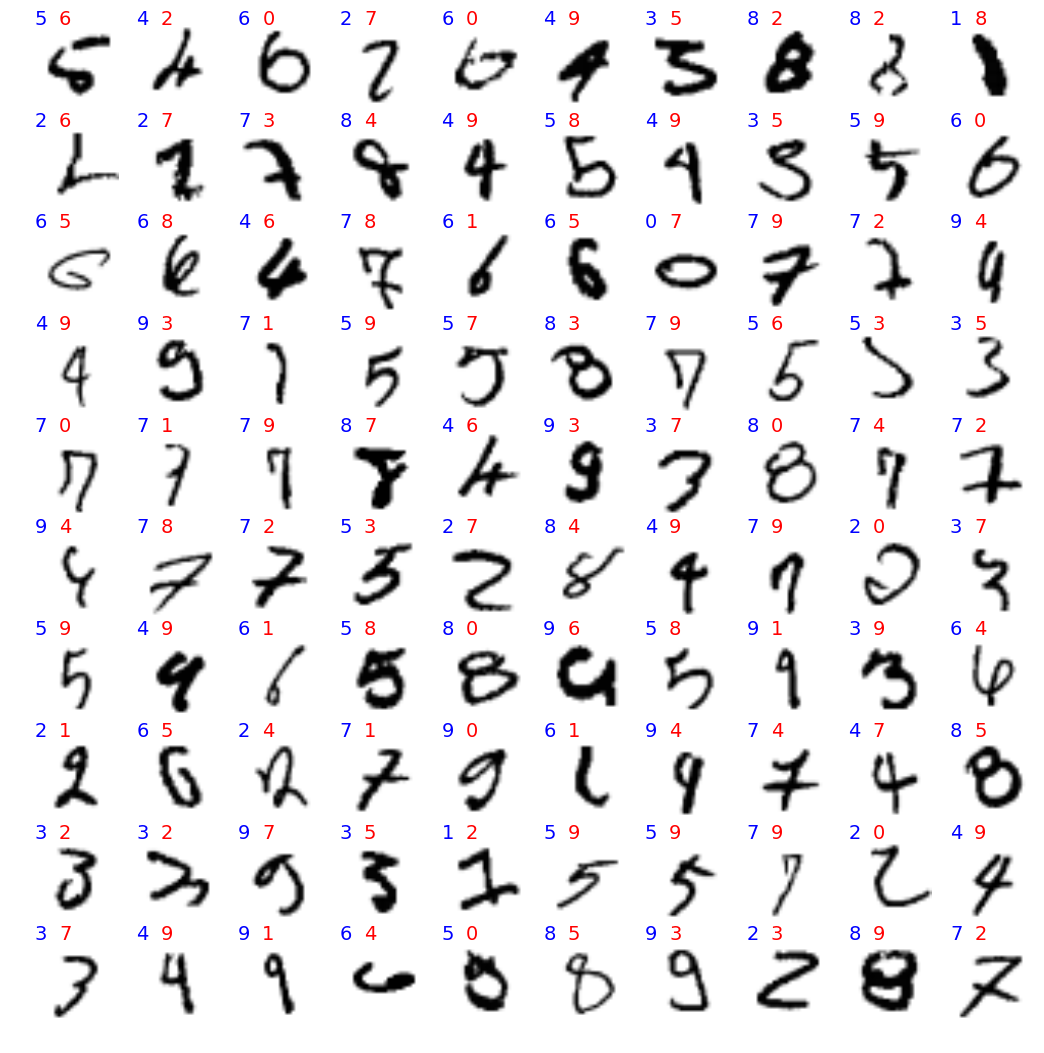

In [26]:
test_wrong = [im for im in zip(X_test,y_hat,y_test) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

## Convolutional Neural Networks

### Basic model

In [44]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32') / 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [42]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape = (1, 28, 28), dim_ordering='th'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
          
rms = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

In [45]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10,
          verbose=1, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 61s - loss: 0.2818 - acc: 0.9188 - val_loss: 0.0993 - val_acc: 0.9737
Epoch 2/10
54000/54000 [==============================] - 63s - loss: 0.1106 - acc: 0.9676 - val_loss: 0.0736 - val_acc: 0.9813
Epoch 3/10
54000/54000 [==============================] - 63s - loss: 0.0864 - acc: 0.9751 - val_loss: 0.0650 - val_acc: 0.9818
Epoch 4/10
54000/54000 [==============================] - 62s - loss: 0.0759 - acc: 0.9777 - val_loss: 0.0644 - val_acc: 0.9823
Epoch 5/10
54000/54000 [==============================] - 60s - loss: 0.0716 - acc: 0.9789 - val_loss: 0.0595 - val_acc: 0.9840
Epoch 6/10
54000/54000 [==============================] - 60s - loss: 0.0677 - acc: 0.9803 - val_loss: 0.0586 - val_acc: 0.9842
Epoch 7/10
54000/54000 [==============================] - 62s - loss: 0.0635 - acc: 0.9816 - val_loss: 0.0634 - val_acc: 0.9840
Epoch 8/10
54000/54000 [==============================]

In [46]:
print(model.layers[0].get_weights()[0].shape) # Convolution2D
print(model.layers[5].get_weights()[0].shape) # Dense

(32, 1, 3, 3)
(6272, 10)


In [47]:
print("\nTest accuracy: {}".format(model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 5s     

Test accuracy: 0.9824


In [48]:
y_hat = model.predict_classes(X_test)
pd.crosstab(y_hat, y_test)

 9984/10000 [============================>.] - ETA: 0s

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,974,0,3,1,1,2,7,1,7,4
1,0,1128,2,0,0,1,2,2,0,4
2,2,3,1009,2,0,1,0,10,1,0
3,0,1,0,989,0,4,0,1,1,1
4,0,1,2,0,975,0,6,0,2,13
5,0,0,0,9,0,875,1,0,1,3
6,2,2,1,0,1,7,941,0,2,0
7,1,0,7,6,0,1,0,1009,4,11
8,1,0,8,3,2,1,1,4,954,3


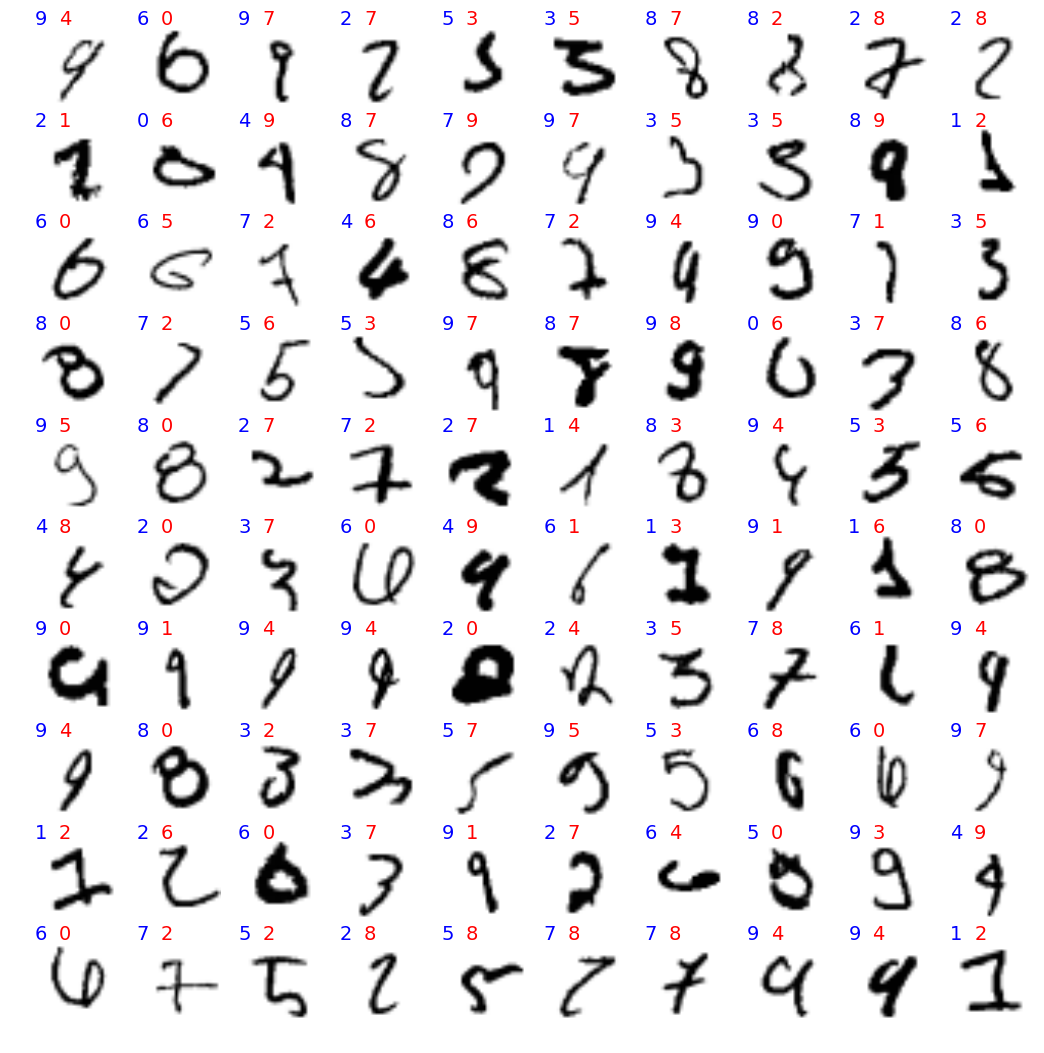

In [49]:
test_wrong = [im for im in zip(X_test,y_hat,y_test) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

### Double Convolution

In [50]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape = (1, 28, 28), dim_ordering='th'))
model.add(Activation("relu"))
model.add(Convolution2D(32, 3, 3, border_mode='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
          
rms = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

In [51]:
model.fit(X_train[:5000], Y_train[:5000], batch_size=32, nb_epoch=10,
          verbose=1, validation_split=0.1)

Train on 4500 samples, validate on 500 samples
Epoch 1/10
4500/4500 [==============================] - 23s - loss: 0.8084 - acc: 0.7416 - val_loss: 0.3945 - val_acc: 0.8840
Epoch 2/10
4500/4500 [==============================] - 23s - loss: 0.3555 - acc: 0.8940 - val_loss: 0.2694 - val_acc: 0.9220
Epoch 3/10
4500/4500 [==============================] - 24s - loss: 0.2582 - acc: 0.9227 - val_loss: 0.2083 - val_acc: 0.9420
Epoch 4/10
4500/4500 [==============================] - 24s - loss: 0.2106 - acc: 0.9342 - val_loss: 0.2006 - val_acc: 0.9420
Epoch 5/10
4500/4500 [==============================] - 25s - loss: 0.1663 - acc: 0.9509 - val_loss: 0.1750 - val_acc: 0.9500
Epoch 6/10
4500/4500 [==============================] - 25s - loss: 0.1438 - acc: 0.9562 - val_loss: 0.1565 - val_acc: 0.9560
Epoch 7/10
4500/4500 [==============================] - 27s - loss: 0.1248 - acc: 0.9624 - val_loss: 0.1581 - val_acc: 0.9580
Epoch 8/10
4500/4500 [==============================] - 30s - loss: 0.1

In [52]:
print("\nTest accuracy: {}".format(model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 16s    

Test accuracy: 0.9631


In [53]:
y_hat = model.predict_classes(X_test)
pd.crosstab(y_hat, y_test)

10000/10000 [==============================] - 16s    


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,966,0,4,0,1,1,5,0,4,1
1,0,1122,2,1,0,1,3,5,1,2
2,4,1,992,6,4,0,3,10,8,0
3,0,3,9,976,0,15,0,2,14,17
4,0,0,1,0,923,0,3,0,4,4
5,1,1,0,10,0,851,13,2,1,2
6,4,1,1,0,2,6,920,0,0,0
7,2,1,17,13,4,4,0,998,7,16
8,3,6,4,3,4,12,11,1,921,5


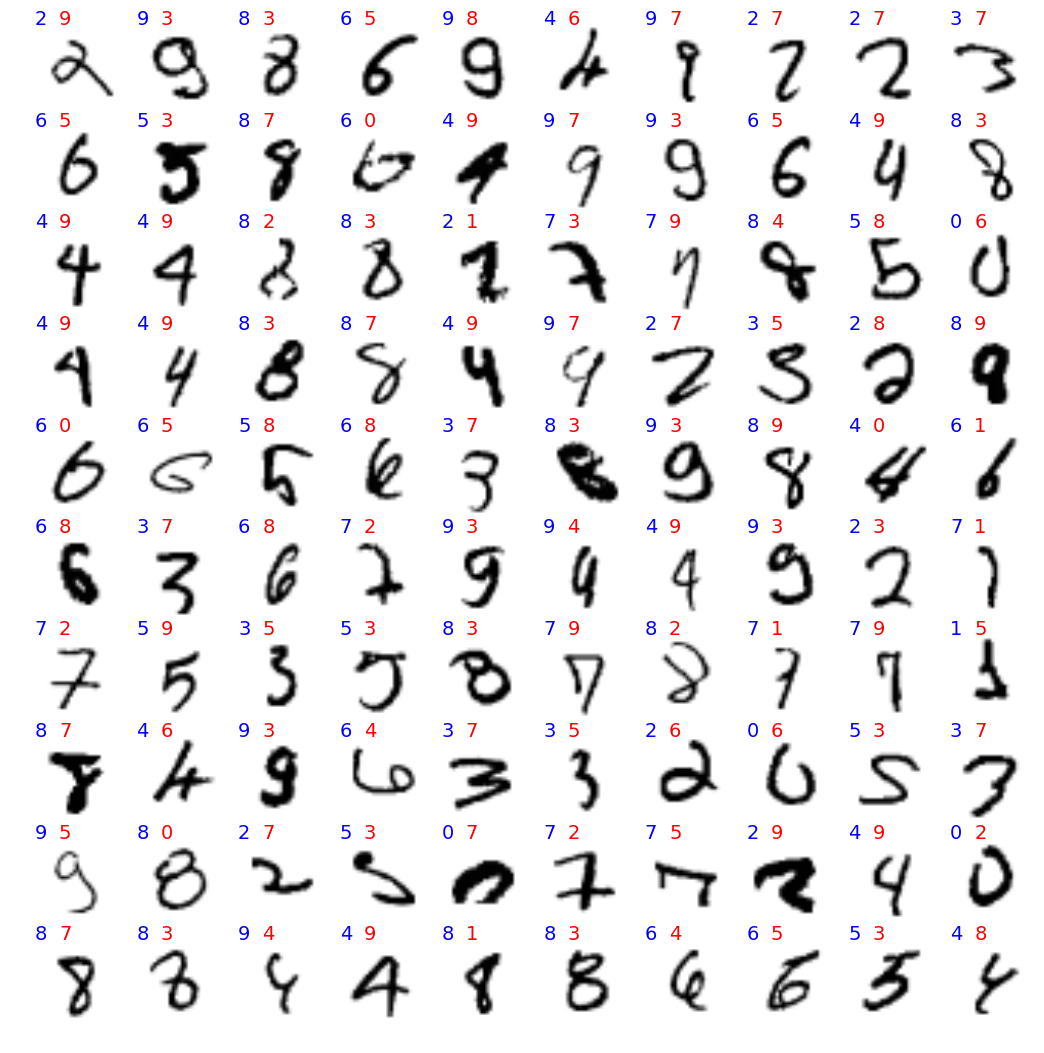

In [54]:
test_wrong = [im for im in zip(X_test,y_hat,y_test) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

### CNN Weights Visualization

In [56]:
print(model.layers) # layers
print(model.layers[0].get_weights()[0].shape) # weights of the very first layer (set of filters)

[<keras.layers.convolutional.Convolution2D object at 0x7f14523ba410>, <keras.layers.core.Activation object at 0x7f1452867ed0>, <keras.layers.convolutional.Convolution2D object at 0x7f1441481190>, <keras.layers.core.Activation object at 0x7f144133aed0>, <keras.layers.pooling.MaxPooling2D object at 0x7f144129d810>, <keras.layers.core.Dropout object at 0x7f144129d890>, <keras.layers.core.Flatten object at 0x7f14412556d0>, <keras.layers.core.Dense object at 0x7f144123ae90>, <keras.layers.core.Activation object at 0x7f1441231590>, <keras.layers.core.Dropout object at 0x7f1441247690>, <keras.layers.core.Dense object at 0x7f14413f0350>, <keras.layers.core.Activation object at 0x7f14413f0450>]
(32, 1, 3, 3)


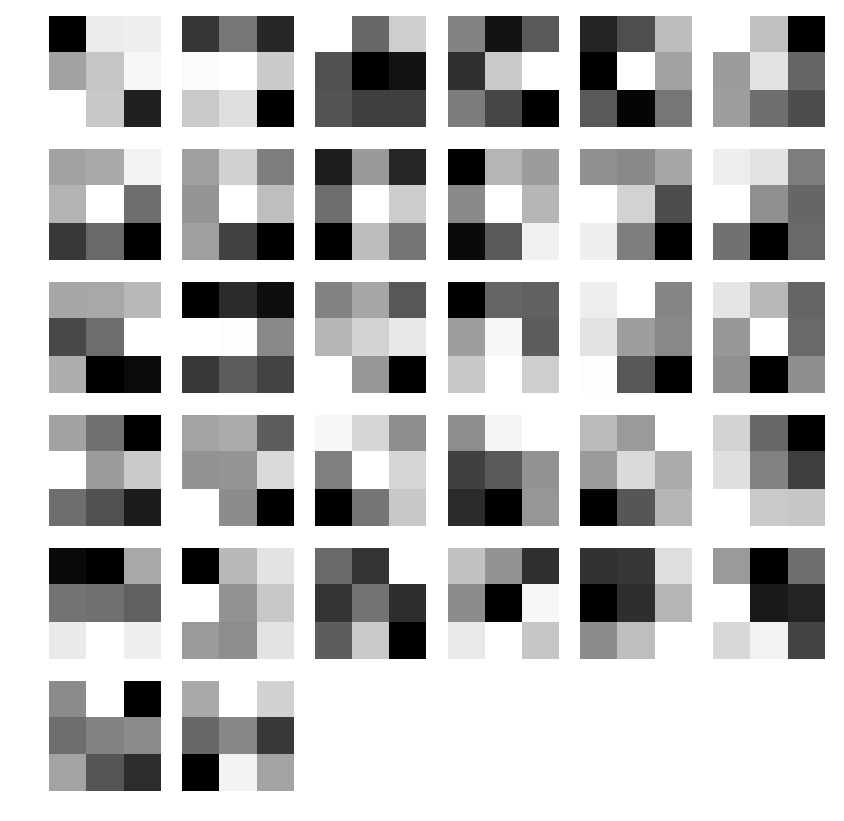

In [57]:
W1 = model.layers[0].get_weights()[0]

plt.figure(figsize=(10, 10), frameon=False)
for ind, val in enumerate(W1):
    plt.subplot(6, 6, ind + 1)
    im = val.reshape((3,3))
    plt.axis("off")
    plt.imshow(im, cmap='gray',interpolation='nearest')

### CNN Activations

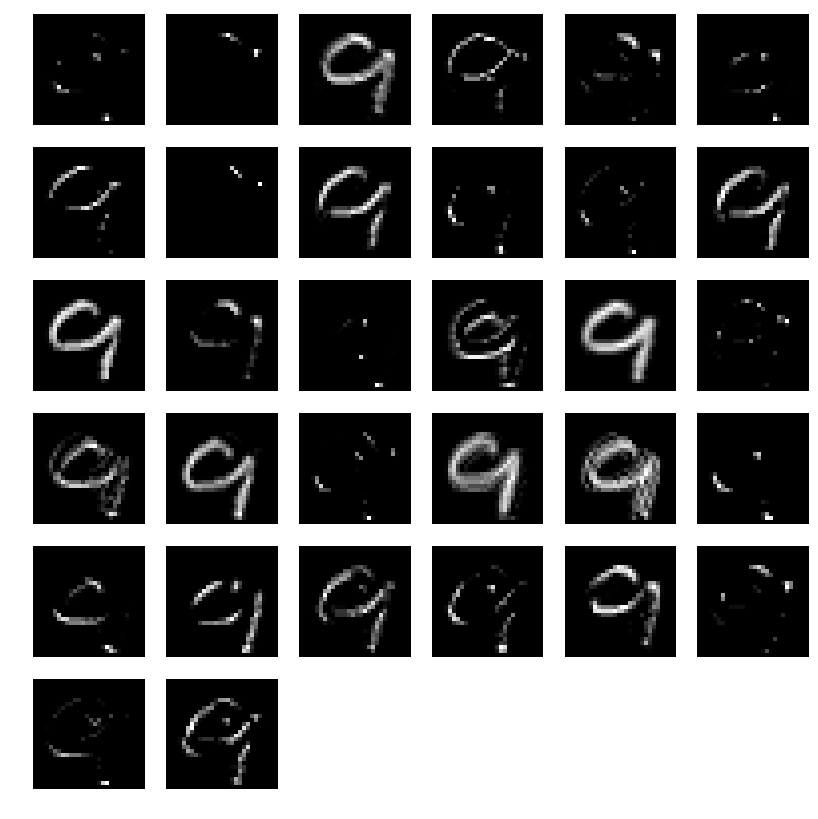

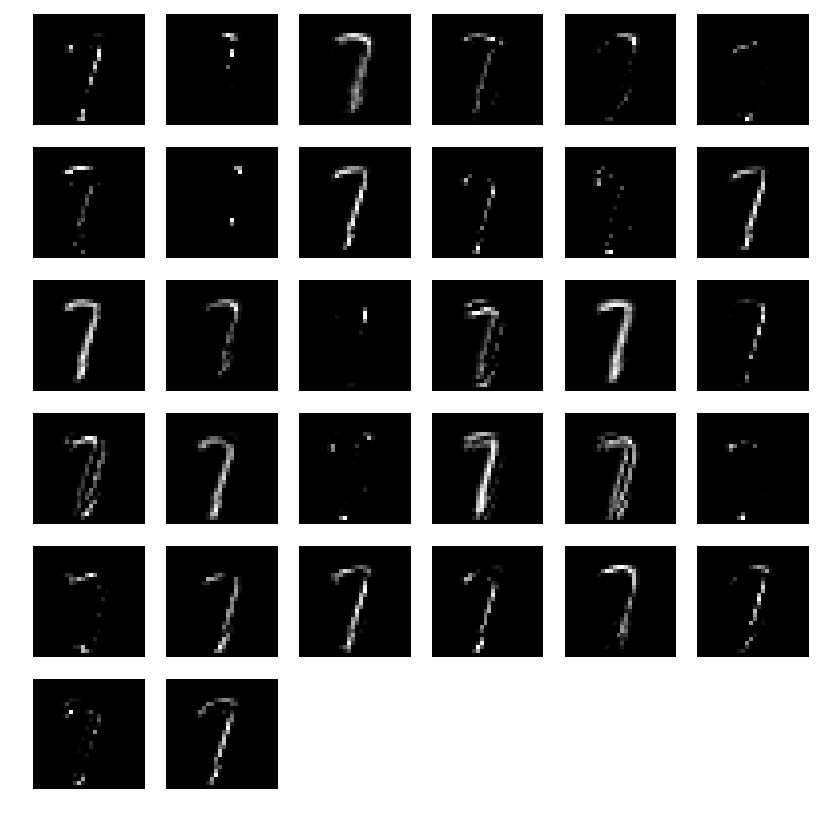

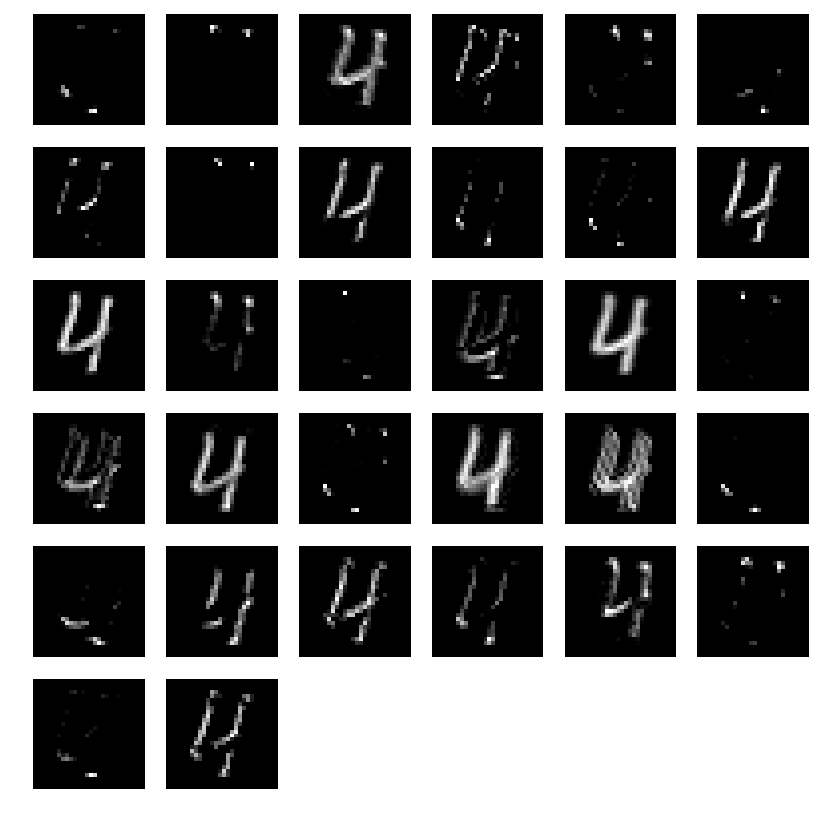

In [87]:
model2 = Sequential()
model2.add(Convolution2D(32, 3, 3, border_mode='same', input_shape = (1, 28, 28), dim_ordering='th'))
model2.add(Activation("relu"))
model2.layers = model.layers[:2]
model2.compile(loss='categorical_crossentropy', optimizer='adam') # don't forget this step!

these = random.choice(range(1000),3,replace=False)
x_rep = model2.predict(X_test[these])

for this_x_rep in x_rep:
    plt.figure(figsize=(10, 10), frameon=False)
    for ind, val in enumerate(this_x_rep):
        plt.subplot(6, 6, ind + 1)
        plt.axis("off")
        plt.imshow(val, cmap='gray',interpolation='nearest')


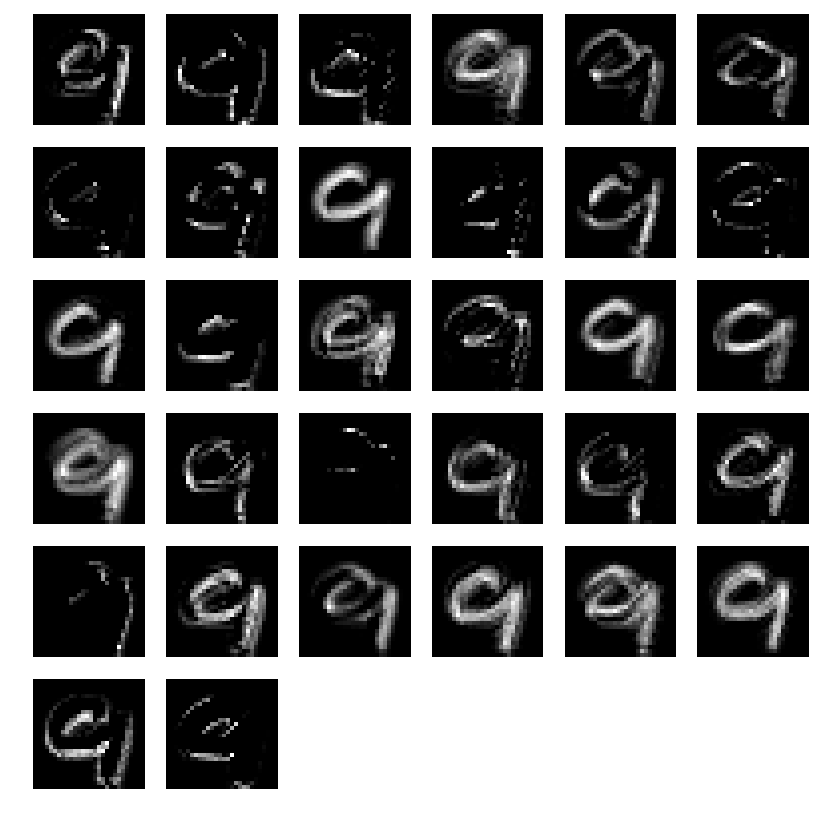

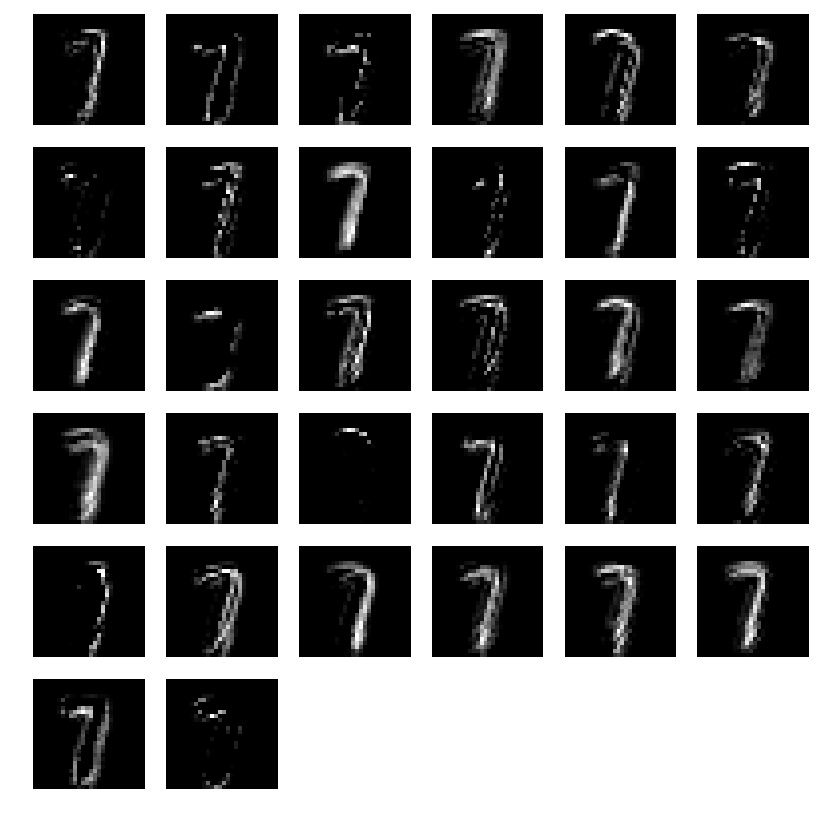

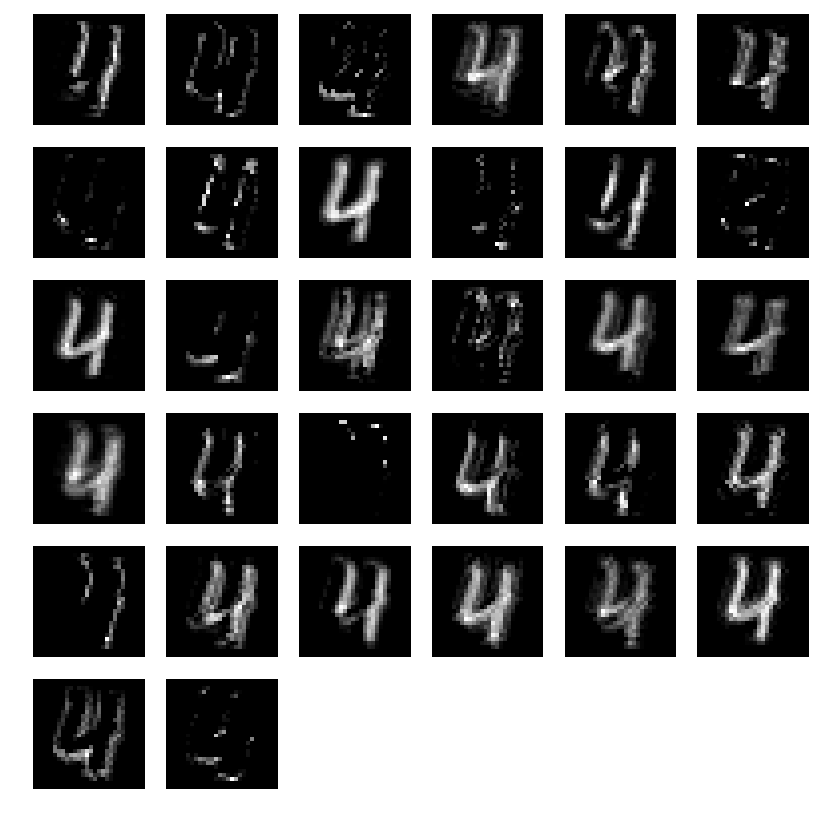

In [88]:
model2 = Sequential()
model2.add(Convolution2D(32, 3, 3, border_mode='same', input_shape = (1, 28, 28), dim_ordering='th'))
model2.add(Activation("relu"))
model2.add(Convolution2D(32, 3, 3, border_mode='same', dim_ordering='th'))
model2.add(Activation("relu"))
model2.layers = model.layers[:4]
model2.compile(loss='categorical_crossentropy', optimizer='adam') # don't forget this step!

x_rep = model2.predict(X_test[these])

for this_x_rep in x_rep:
    plt.figure(figsize=(10, 10), frameon=False)
    for ind, val in enumerate(this_x_rep):
        plt.subplot(6, 6, ind + 1)
        plt.axis("off")
        plt.imshow(val, cmap='gray',interpolation='nearest')

(3, 16, 14, 28)


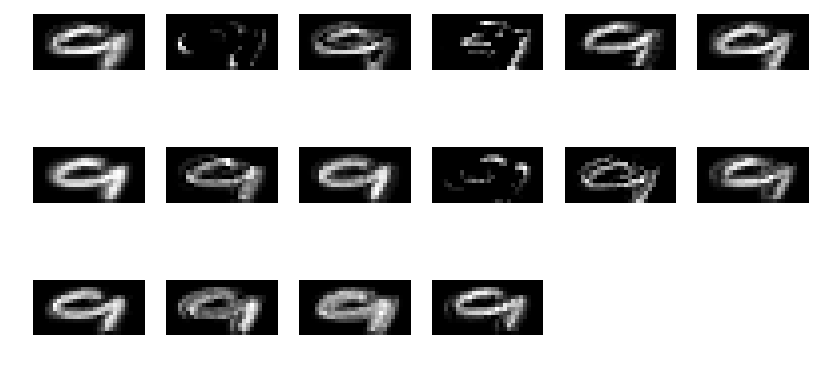

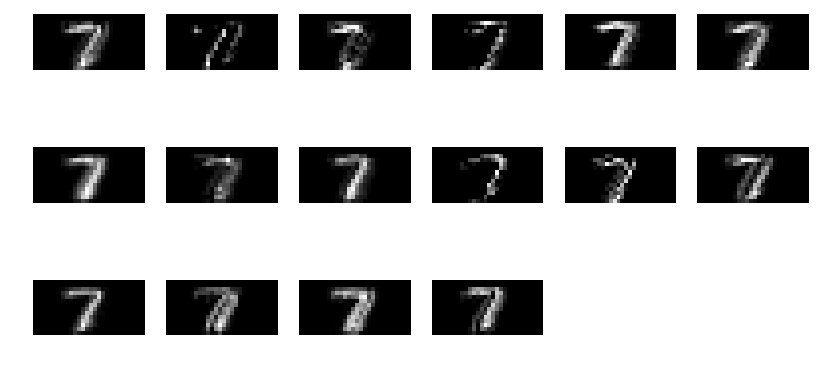

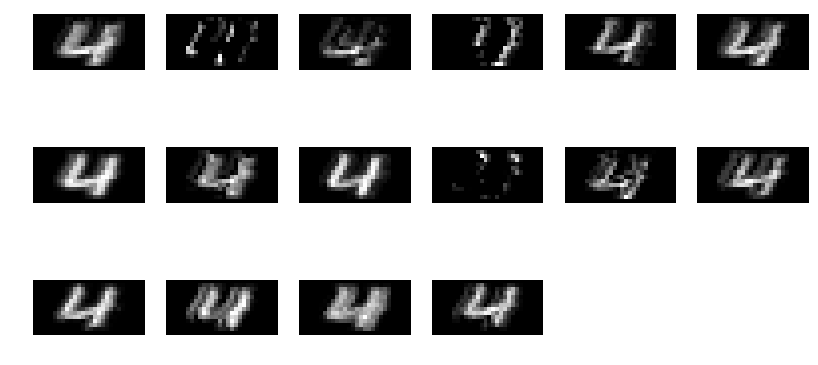

In [90]:
model2 = Sequential()
model2.add(Convolution2D(32, 3, 3, border_mode='same', input_shape = (1, 28, 28), dim_ordering='th'))
model2.add(Activation("relu"))
model2.add(Convolution2D(32, 3, 3, border_mode='same', dim_ordering='th'))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.layers = model.layers[:5]
model2.compile(loss='categorical_crossentropy', optimizer='adam') # don't forget this step!

x_rep = model2.predict(X_test[these])

for this_x_rep in x_rep:
    plt.figure(figsize=(10, 10), frameon=False)
    for ind, val in enumerate(this_x_rep):
        plt.subplot(6, 6, ind + 1)
        plt.axis("off")
        plt.imshow(val, cmap='gray',interpolation='nearest')

## RNN

In [95]:
path = "./data/aclImdb/"

ff = [path + "train/pos/" + x for x in os.listdir(path + "train/pos")] + \
     [path + "train/neg/" + x for x in os.listdir(path + "train/neg")] + \
     [path + "test/pos/" + x for x in os.listdir(path + "test/pos")] + \
     [path + "test/neg/" + x for x in os.listdir(path + "test/neg")]

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)
    
input_label = ([1] * 12500 + [0] * 12500) * 2
input_text  = []

for f in ff:
    with open(f) as fin:
        pass
        input_text += [remove_tags(" ".join(fin.readlines()))]

In [99]:
num_words = 2000
tok = Tokenizer(num_words)
tok.fit_on_texts(input_text[:25000])

words = []
for iter in range(num_words):
    words += [key for key,value in tok.word_index.items() if value==iter+1]

X_train = tok.texts_to_sequences(input_text[:25000])
X_test  = tok.texts_to_sequences(input_text[25000:])
y_train = input_label[:25000]
y_test  = input_label[25000:]

X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test  = sequence.pad_sequences(X_test,  maxlen=100)

In [100]:
def reconstruct_text(index, words):
    text = []
    for ind in index:
        if ind != 0:
            text += [words[ind-1]]
        else:
            text += [""]
    return text

print(input_text[100])
print("\n\n")
print(reconstruct_text(X_train[100][:40], words))

This film opened to poor showings in the first few weeks. Then Meena Kumari died and it just brought the crowds rolling in. Songs on All India Radio, especially Inhi LogoN ne were played so often that I was sick of them at the time, despite recognising their beauty! Yes, it did take all those years to make. This was because the marriage was a very unhappy one and Kamal Amrohi also had difficulty finding the money to make the film; looking at the sumptous sets and costumes, not surprising!! Not only does Meena Kumari age and fall ill but listen carefully to Lata's voice. Inhi logoN ne has her 50's younger voice while songs that were re-recorded like Chalo dildar chalo show clear development. I only wish someone would find the Ghulam Mohammad songs that weren't included in the film, because of changing fashions that called for fewer though slightly songs and publish them. Lata in a recent interview (2007) rated Ghulam Mohammad as one of the best composers she had ever worked with, apart 

In [103]:
model = Sequential()

model.add(Embedding(num_words, 32, input_length=100))
model.add(Dropout(0.25))

model.add(SimpleRNN(16, return_sequences=False))

model.add(Dense(256))
model.add(Dropout(0.25))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [104]:
model.fit(X_train, y_train, batch_size=32, nb_epoch=5, verbose=1,
          validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 25s - loss: 0.5240 - acc: 0.7139 - val_loss: 0.3835 - val_acc: 0.8339
Epoch 2/5
25000/25000 [==============================] - 23s - loss: 0.3846 - acc: 0.8339 - val_loss: 0.4690 - val_acc: 0.8012
Epoch 3/5
25000/25000 [==============================] - 23s - loss: 0.3557 - acc: 0.8476 - val_loss: 0.3825 - val_acc: 0.8291
Epoch 4/5
25000/25000 [==============================] - 23s - loss: 0.3339 - acc: 0.8607 - val_loss: 0.3589 - val_acc: 0.8411
Epoch 5/5
25000/25000 [==============================] - 23s - loss: 0.3197 - acc: 0.8665 - val_loss: 0.3512 - val_acc: 0.8444


In [107]:
model2 = Sequential()

model2.add(Embedding(num_words, 32, input_length=100))
model2.add(Dropout(0.25))

model2.add(SimpleRNN(16, return_sequences=True))

model2.add(TimeDistributed(Dense(256)))
model2.add(Dropout(0.25))
model2.add(Activation('relu'))

model2.add(TimeDistributed(Dense(1)))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [108]:
model2.set_weights(model.get_weights())

In [109]:
y_hat2 = model2.predict(X_train)
y_hat2.shape

(25000, 100, 1)

Its Hollywood imitating Daytiem Soap Operas at its finest! Its the fun that we never see. Great characters and great lines. Whoopi is hilarious.....Sally Field is so over the top....Gary Marshalls lines are a riot....this is what I love about good comedies. Never afraid to poke fun at themselves!!!!!!The sets were great....wardrobe was on point and the backstabbing "Montana Morehead" was a devilish delight. Terri Hatcher as "Dr. Monica Demonico" didn't have enough lines but none the less still gorgeous and fun when on screen. I would love to know how the idea for this movie came up. Never have I seen a cast of people have so much fun in making comedy work! Soapdish is a must have and I am waiting for the DVD!!!


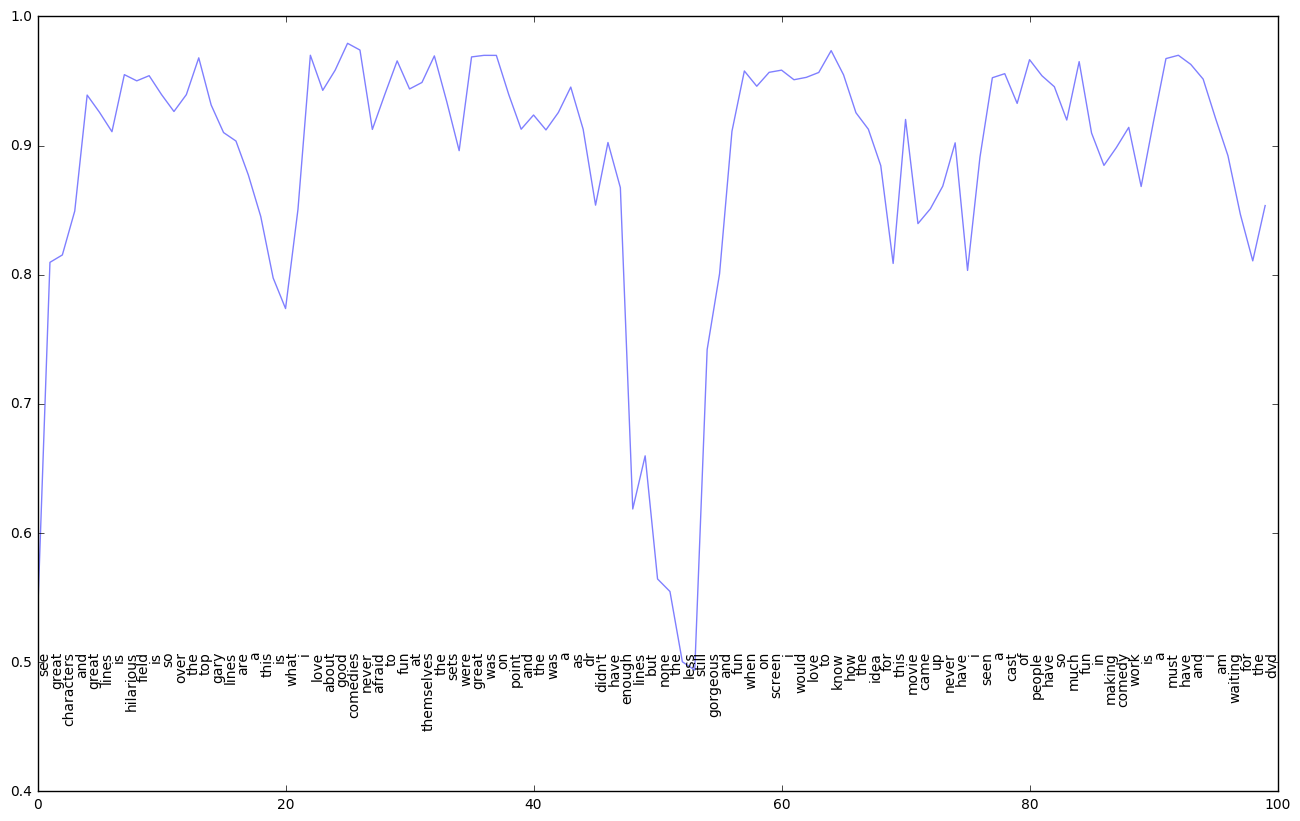

In [115]:
ind = 123
tokens = reconstruct_text(X_train[ind], words)

print(input_text[ind])

plt.figure(figsize=(16, 10))
plt.plot(y_hat2[ind],alpha=0.5)
for i in range(len(tokens)):
    plt.text(i,0.5,tokens[i],rotation=90)

This film opened to poor showings in the first few weeks. Then Meena Kumari died and it just brought the crowds rolling in. Songs on All India Radio, especially Inhi LogoN ne were played so often that I was sick of them at the time, despite recognising their beauty! Yes, it did take all those years to make. This was because the marriage was a very unhappy one and Kamal Amrohi also had difficulty finding the money to make the film; looking at the sumptous sets and costumes, not surprising!! Not only does Meena Kumari age and fall ill but listen carefully to Lata's voice. Inhi logoN ne has her 50's younger voice while songs that were re-recorded like Chalo dildar chalo show clear development. I only wish someone would find the Ghulam Mohammad songs that weren't included in the film, because of changing fashions that called for fewer though slightly songs and publish them. Lata in a recent interview (2007) rated Ghulam Mohammad as one of the best composers she had ever worked with, apart 

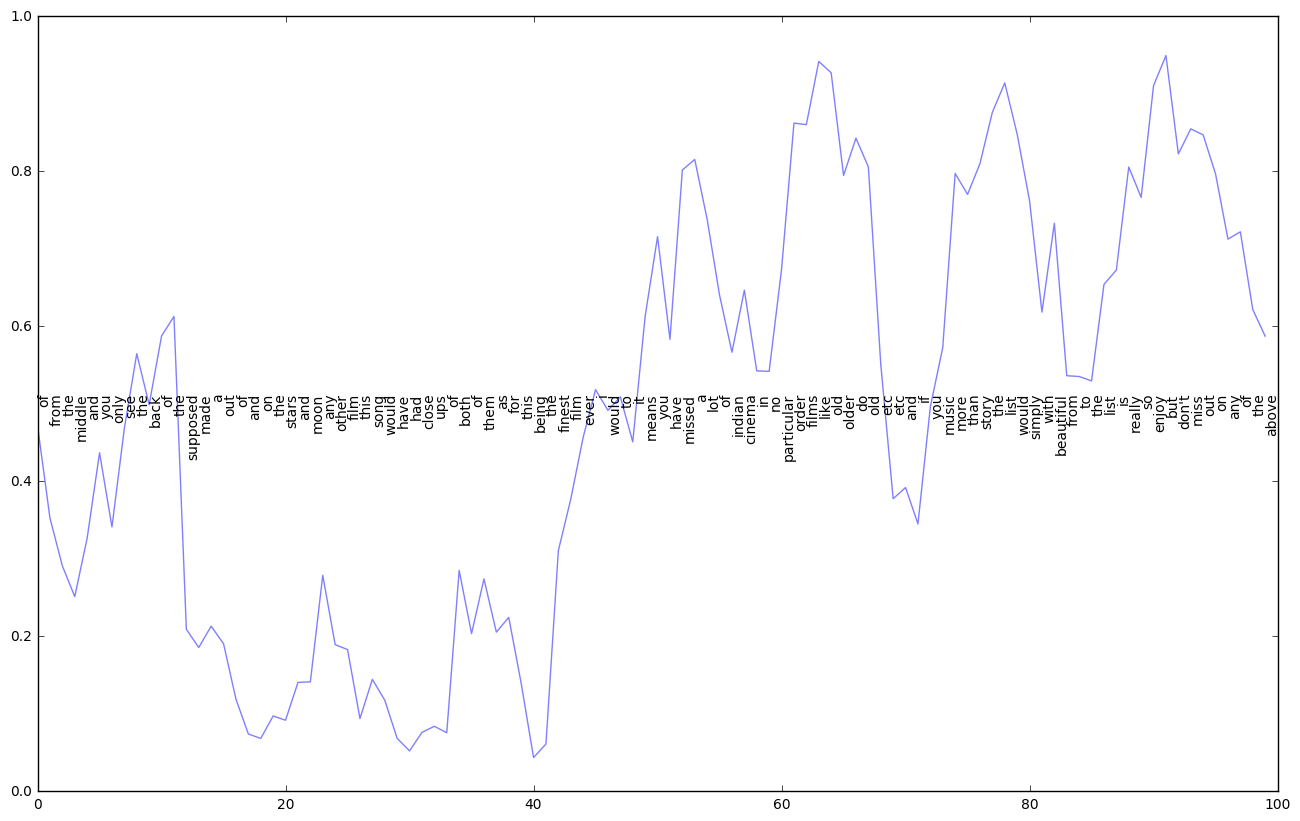

In [118]:
ind = 100
tokens = reconstruct_text(X_train[ind], words)

print(input_text[ind])

plt.figure(figsize=(16, 10))
plt.plot(y_hat2[ind],alpha=0.5)
for i in range(len(tokens)):
    plt.text(i,0.5,tokens[i],rotation=90)

I've just finished listening to the director's commentary for this film, and I think the one big thing I got from it that I agree with is that this film, like Mann's The Insider, is completely subjective. It's from Howard's POV. So, any review or attempt at contemplating a set of comments about it, as Ebert did, is really about Nolte's character actually. If you feel, as he did, that the film "does not work", then you're saying, I think, that Howard does not work. And, to be frank, you might be right. Howard's reasoning and personality really wouldn't stand up to professional mental treatments and analysis.But, hey, that's the nature of people.Andrew.


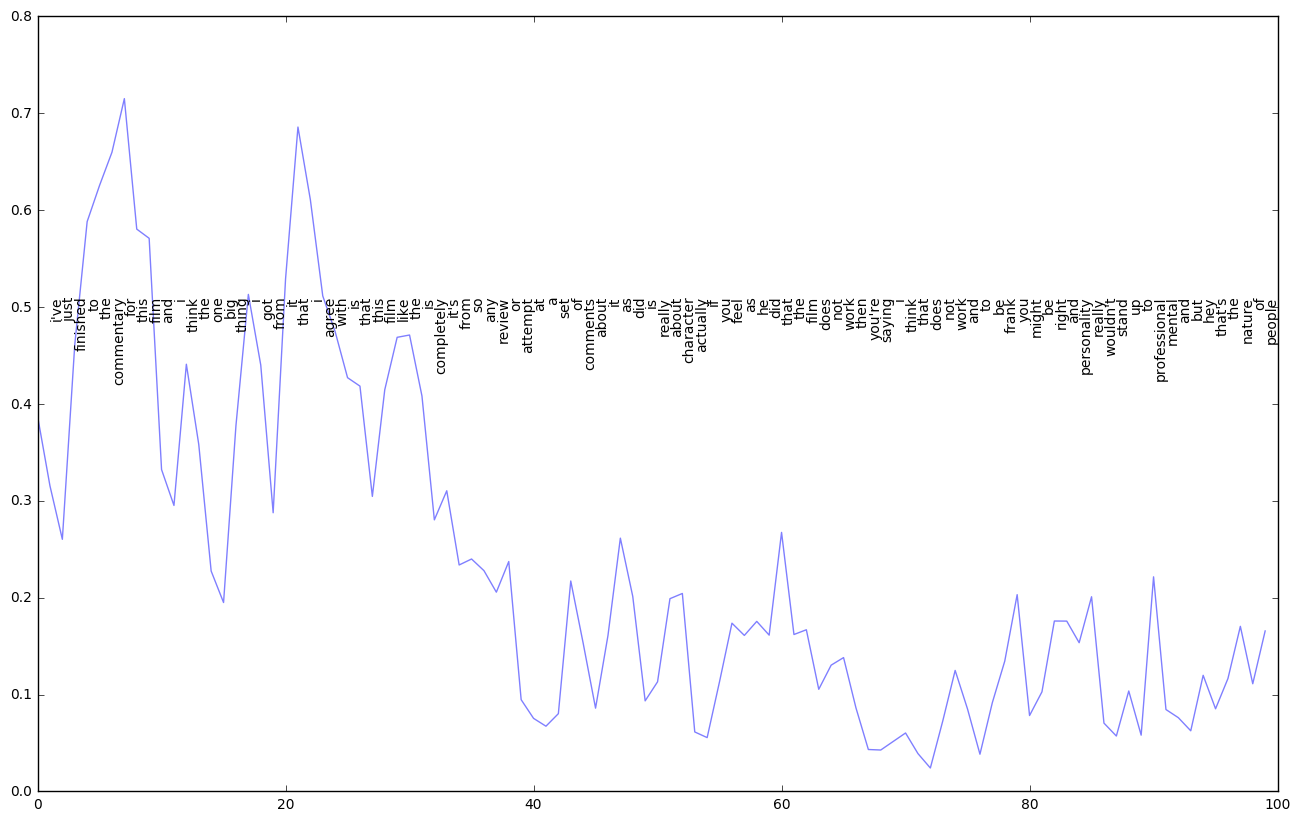

In [124]:
ind = 4321
tokens = reconstruct_text(X_train[ind], words)

print(input_text[ind])

plt.figure(figsize=(16, 10))
plt.plot(y_hat2[ind],alpha=0.5)
for i in range(len(tokens)):
    plt.text(i,0.5,tokens[i],rotation=90)

## Appendix: Callbacks

In [127]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32') / 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

model = Sequential()

model.add(Flatten(input_shape = (1, 28, 28)))
model.add(Dense(128, init="glorot_normal"))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

rms = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

In [128]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=25,
          verbose=1, validation_split=0.1,
         callbacks=[EarlyStopping(monitor='val_loss', patience=0)])

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 7s - loss: 0.4175 - acc: 0.8776 - val_loss: 0.1581 - val_acc: 0.9552
Epoch 2/25
54000/54000 [==============================] - 6s - loss: 0.2520 - acc: 0.9280 - val_loss: 0.1331 - val_acc: 0.9652
Epoch 3/25
54000/54000 [==============================] - 7s - loss: 0.2246 - acc: 0.9384 - val_loss: 0.1184 - val_acc: 0.9685
Epoch 4/25
54000/54000 [==============================] - 7s - loss: 0.2089 - acc: 0.9440 - val_loss: 0.1167 - val_acc: 0.9695
Epoch 5/25
54000/54000 [==============================] - 7s - loss: 0.2045 - acc: 0.9476 - val_loss: 0.1200 - val_acc: 0.9698
